# Final Dataset Information: Train + Test Sets#

Datasets of Shanghai and Beijing subway station Networks


## Import libraries

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

## Graph Visualization Function

In [ ]:
def draw(G, pos, measures, measure_name):

    plt.figure(figsize=(20, 20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name, fontsize=30)
    # plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Import graph dataset: Shanghai and Beijing Subway Networks

In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload datasets:
# 1) "Subway station connections_Shanghai_New.csv" and "Node Properties_Shanghai_New.csv", which will be used as the training datasets
# 2) "Subway station connections_Beijing_New.csv" and "Node Properties_Beijing_New.csv", which will be used as the test datasets

Saving Subway station connections_Shanghai_New.csv to Subway station connections_Shanghai_New.csv
Saving Node Properties_Beijing_New.csv to Node Properties_Beijing_New.csv
Saving Node Properties_Shanghai_New.csv to Node Properties_Shanghai_New.csv
Saving Subway station connections_Beijing_New.csv to Subway station connections_Beijing_New.csv


# 1) Import Training Dataset: Shanghai Subway Station Network

In [ ]:
# Import Shanghai Subway Stations Network
df_Train = pd.read_csv('Subway station connections_Shanghai_New.csv')

In [ ]:
df_Train

,Source,Destination,Line,Time(min)
0,Xinzhuang,Waihuanlu,1,2
1,Waihuanlu,Lianhua Road,1,2
2,Lianhua Road,Jinjiang Park,1,3
3,Jinjiang Park,Shanghai South Railway Station,1,3
4,Shanghai South Railway Station,Caobao Road,1,3
...,...,...,...,...
484,Fushun Road,Guoquan Road,18,2
485,Guoquan Road,Fudan University,18,3
486,Fudan University,Shanghai University of Finance and Economics,18,2
487,Shanghai University of Finance and Economics,Yin'gao Road,18,2


## Creat Graph

In [ ]:
# Creat Undirected Graph
G_Train = nx.Graph()

## Creat graph from edge list

In [ ]:
for idx, row in df_Train.iterrows(): # go through every row of the list
    G_Train.add_edges_from([(row['Source'], row['Destination'])], line=row['Line'], time=row['Time(min)'])

## Check if the dataset was imported successfully

In [ ]:
# Number of Nodes
len(G_Train)

399

In [ ]:
# Number of Nodes
len(G_Train.nodes)

399

In [ ]:
# Number of Edges
len(G_Train.edges)

477

In [ ]:
# Check the edge properties
G_Train.edges[('Tongji University', 'Siping Road')]

{'line': 10, 'time': 2}

## Import node properties

In [ ]:
# Import node properties from a .csv file
node_attributes_Train = pd.read_csv("Node Properties_Shanghai_New.csv")

In [ ]:
node_attributes_Train

,Station,Longitude,Latitude,District Average,House_price_1000m,Built Year,Green Rate,Plot Ratio,Label
0,Qibao,-0.957950,-0.620547,0.363328,0.297806,2003.838240,0.412424,1.342633,2
1,Qixin Road,-0.809989,-0.814427,0.363328,0.422085,2005.328715,0.434595,1.868891,3
2,Sanlin,0.329763,-0.711468,0.449293,0.301037,1999.498535,0.313408,1.423097,2
3,East Sanlin,0.418799,-0.678668,0.449293,0.342976,2001.386353,0.366249,1.643678,2
4,Sanmen Road,0.303272,0.889699,0.436250,0.361622,1996.928131,0.326240,1.675197,2
...,...,...,...,...,...,...,...,...,...
394,Longbai Xincun,-0.758814,-0.387909,0.363328,0.360134,2003.881795,0.340330,1.481600,2
395,Longxi Road,-0.683601,-0.229910,0.515968,0.312401,1994.704498,0.278565,2.239524,2
396,Longcao Road,-0.189742,-0.459774,0.558781,0.492007,1999.729696,0.343941,2.089083,4
397,longyao Road,-0.070515,-0.555081,0.558781,0.487824,2000.871216,0.315127,1.826232,4


In [ ]:
for index, row in node_attributes_Train.iterrows():
    station_name = row["Station"]
    G_Train.nodes[station_name]["Longitude"] = row["Longitude"]
    G_Train.nodes[station_name]["Latitude"] = row["Latitude"]
    G_Train.nodes[station_name]["District Average"] = row["District Average"]
    G_Train.nodes[station_name]["House_price_1000m"] = row["House_price_1000m"]
    G_Train.nodes[station_name]["Built Year"] = row["Built Year"]
    G_Train.nodes[station_name]["Green Rate"] = row["Green Rate"]
    G_Train.nodes[station_name]["Plot Ratio"] = row["Plot Ratio"]
    G_Train.nodes[station_name]["Label"] = row["Label"]

In [ ]:
node_name = "Longyang Road"  # Check if the node properties was imported successfully
if G_Train.has_node(node_name):
    attributes = G_Train.nodes[node_name]
    print(f"Node: {node_name}, has Properties：{attributes}")
else:
    print(f"Node {node_name} does not exist in the graph.")

Node: Longyang Road, has Properties：{'Longitude': 0.6827229495901418, 'Latitude': -0.1514704096904746, 'District Average': 0.4492926107703334, 'House_price_1000m': 0.518163025176683, 'Built Year': 2001.473474, 'Green Rate': 0.3814546, 'Plot Ratio': 2.0661784, 'Label': 4}


## Graph Visualization

In [ ]:
# Graph layout visualization
pos = nx.spring_layout(G_Train, seed=123)

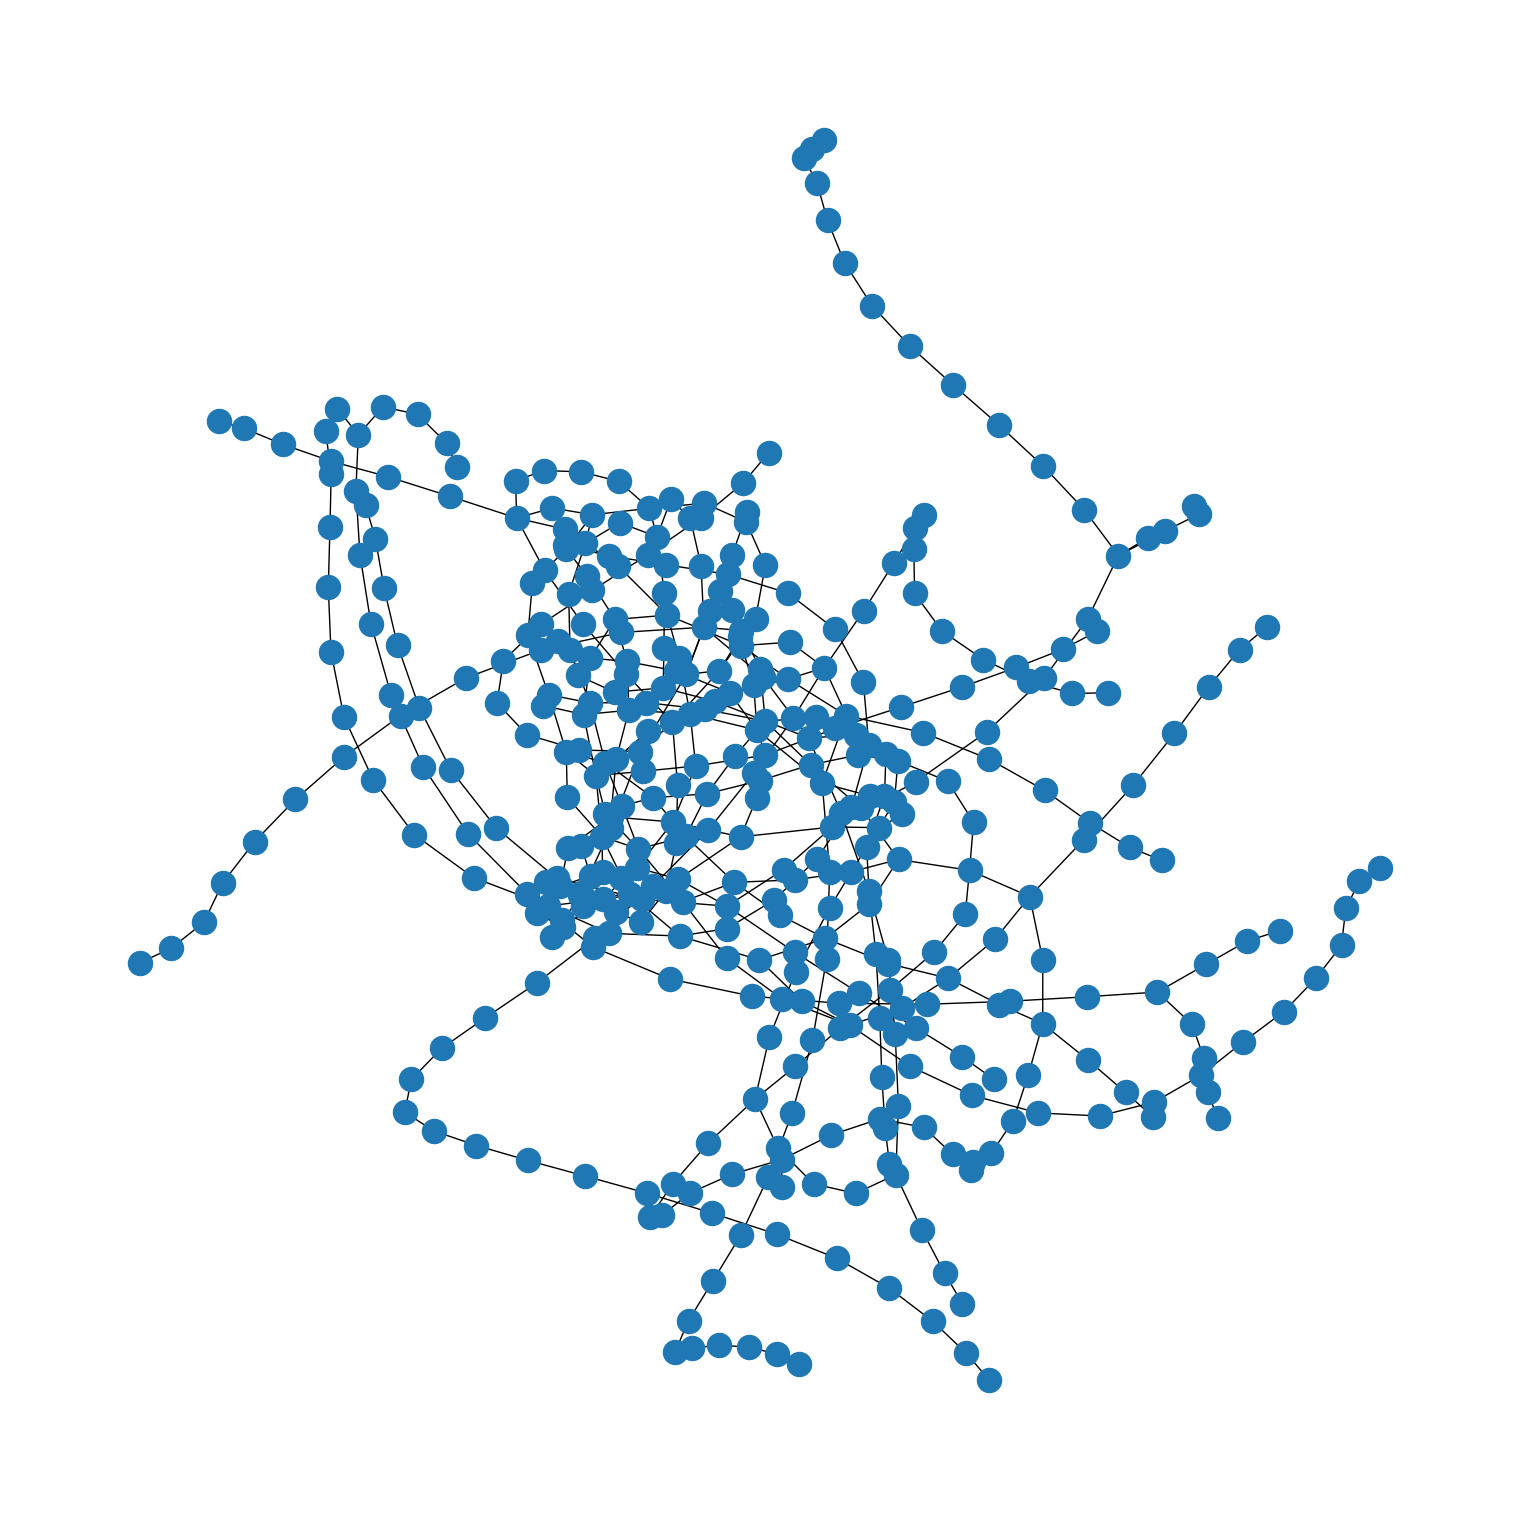

In [ ]:
plt.figure(figsize=(15,15))
nx.draw(G_Train, pos=pos)

## Node Degree

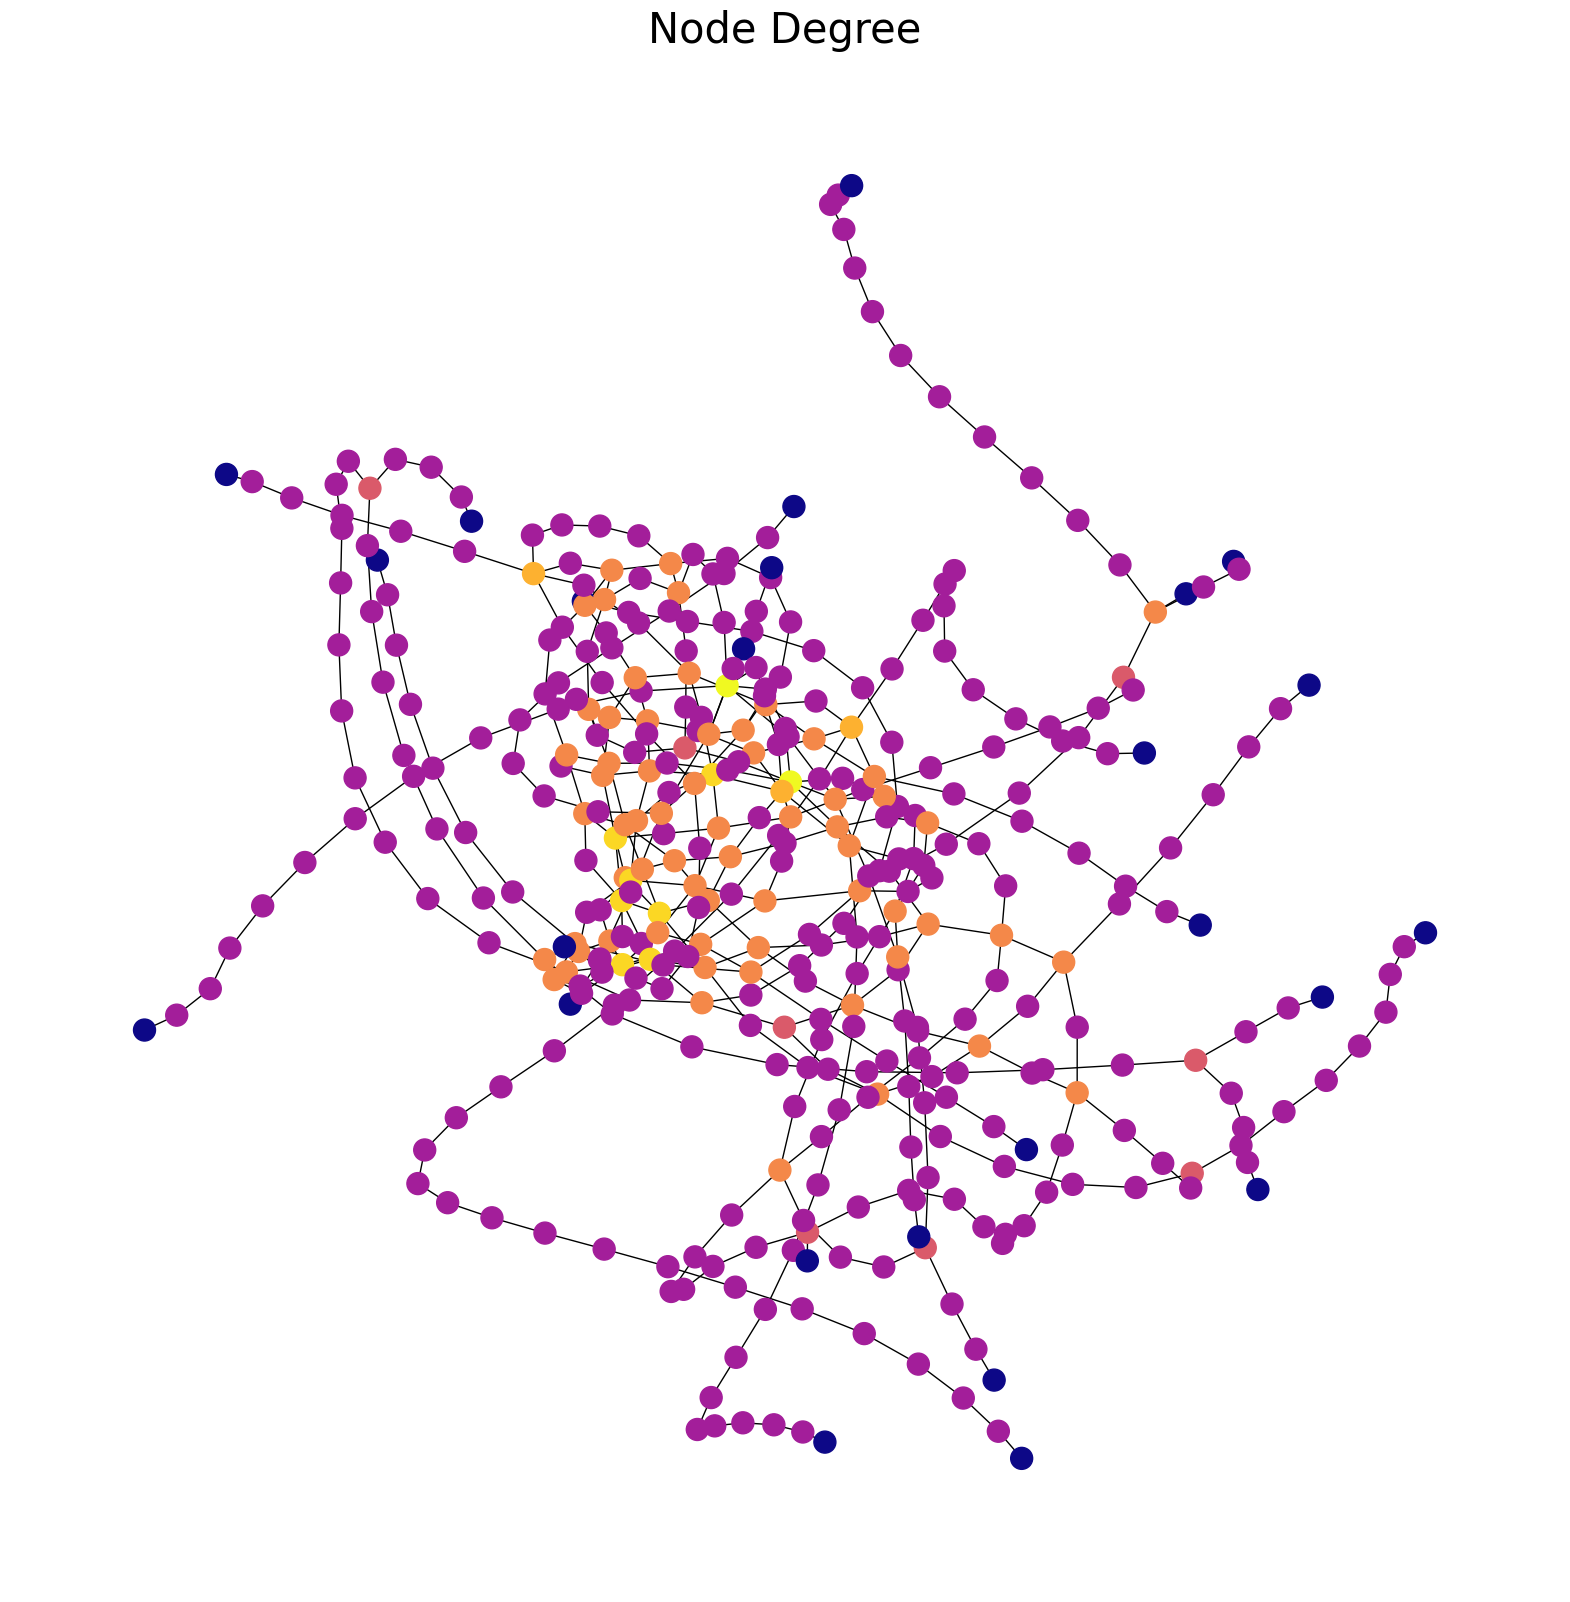

In [ ]:
draw(G_Train, pos, dict(G_Train.degree()), 'Node Degree')

## Degree Centrality

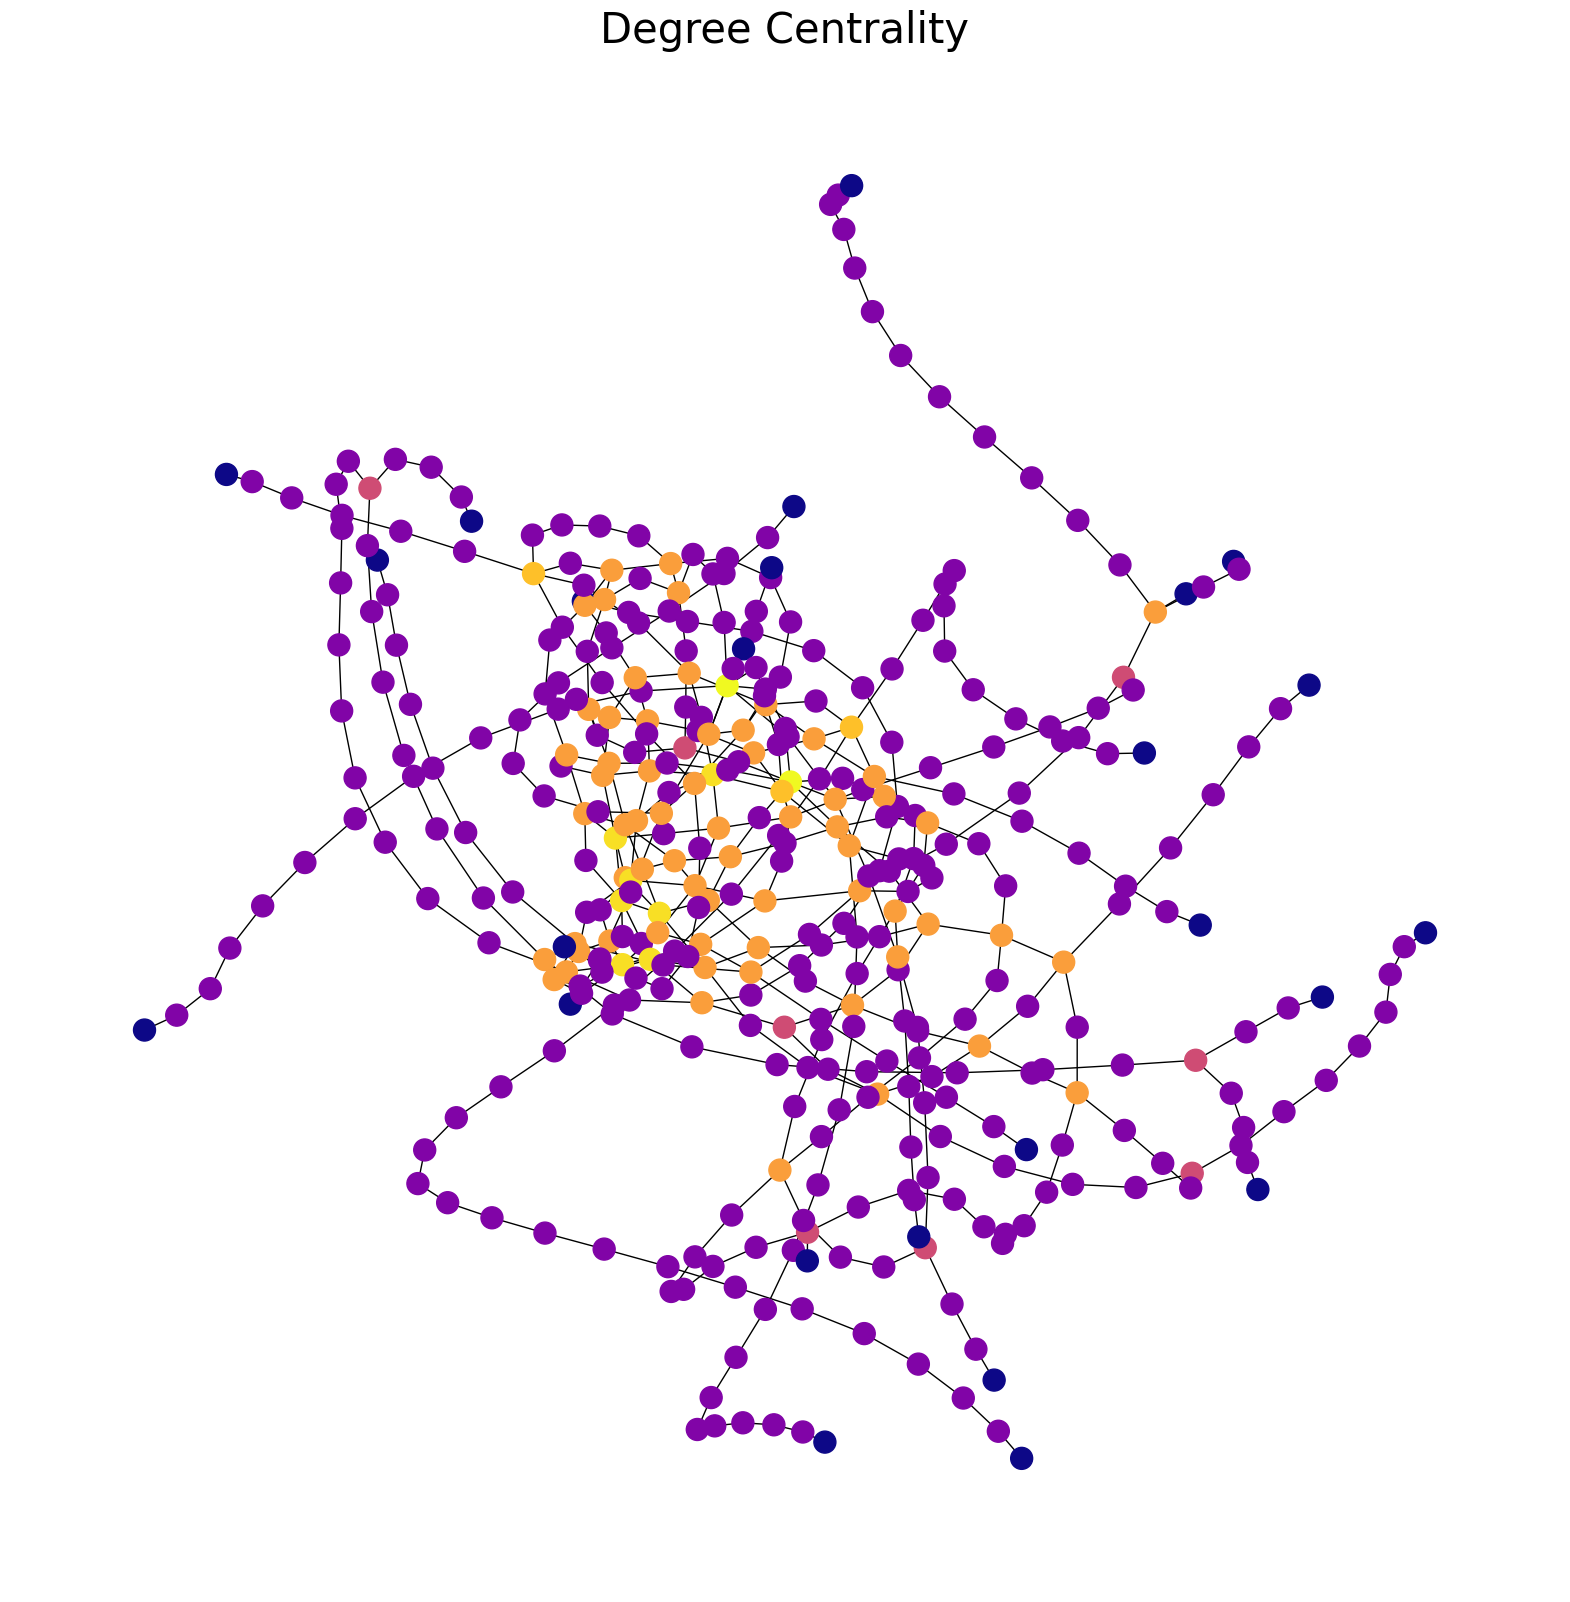

In [ ]:
draw(G_Train, pos, nx.degree_centrality(G_Train), 'Degree Centrality')

## Betweenness Centrality

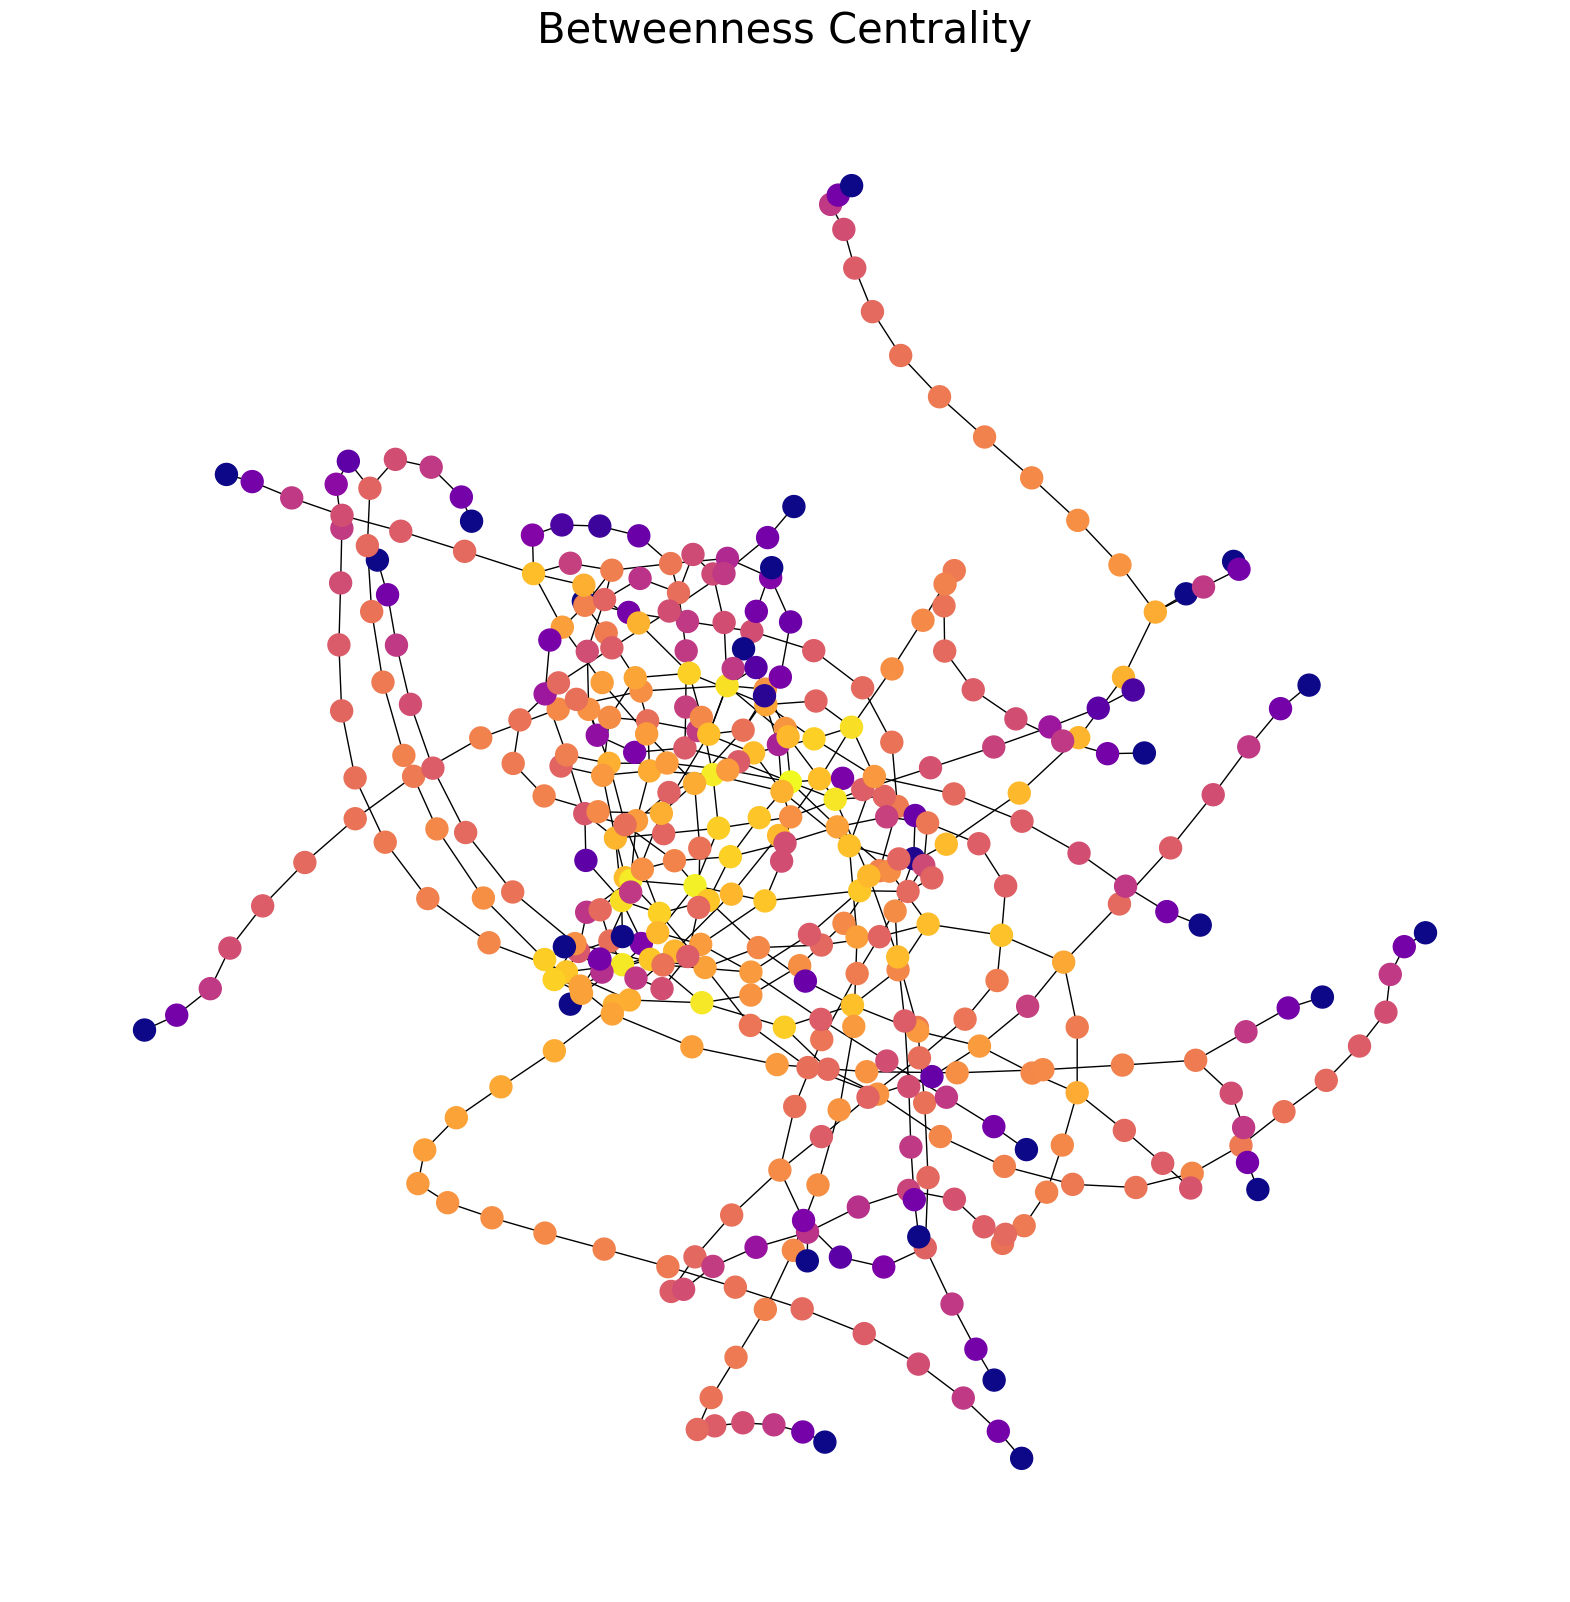

In [ ]:
draw(G_Train, pos, nx.betweenness_centrality(G_Train), 'Betweenness Centrality')

## Closeness Centrality

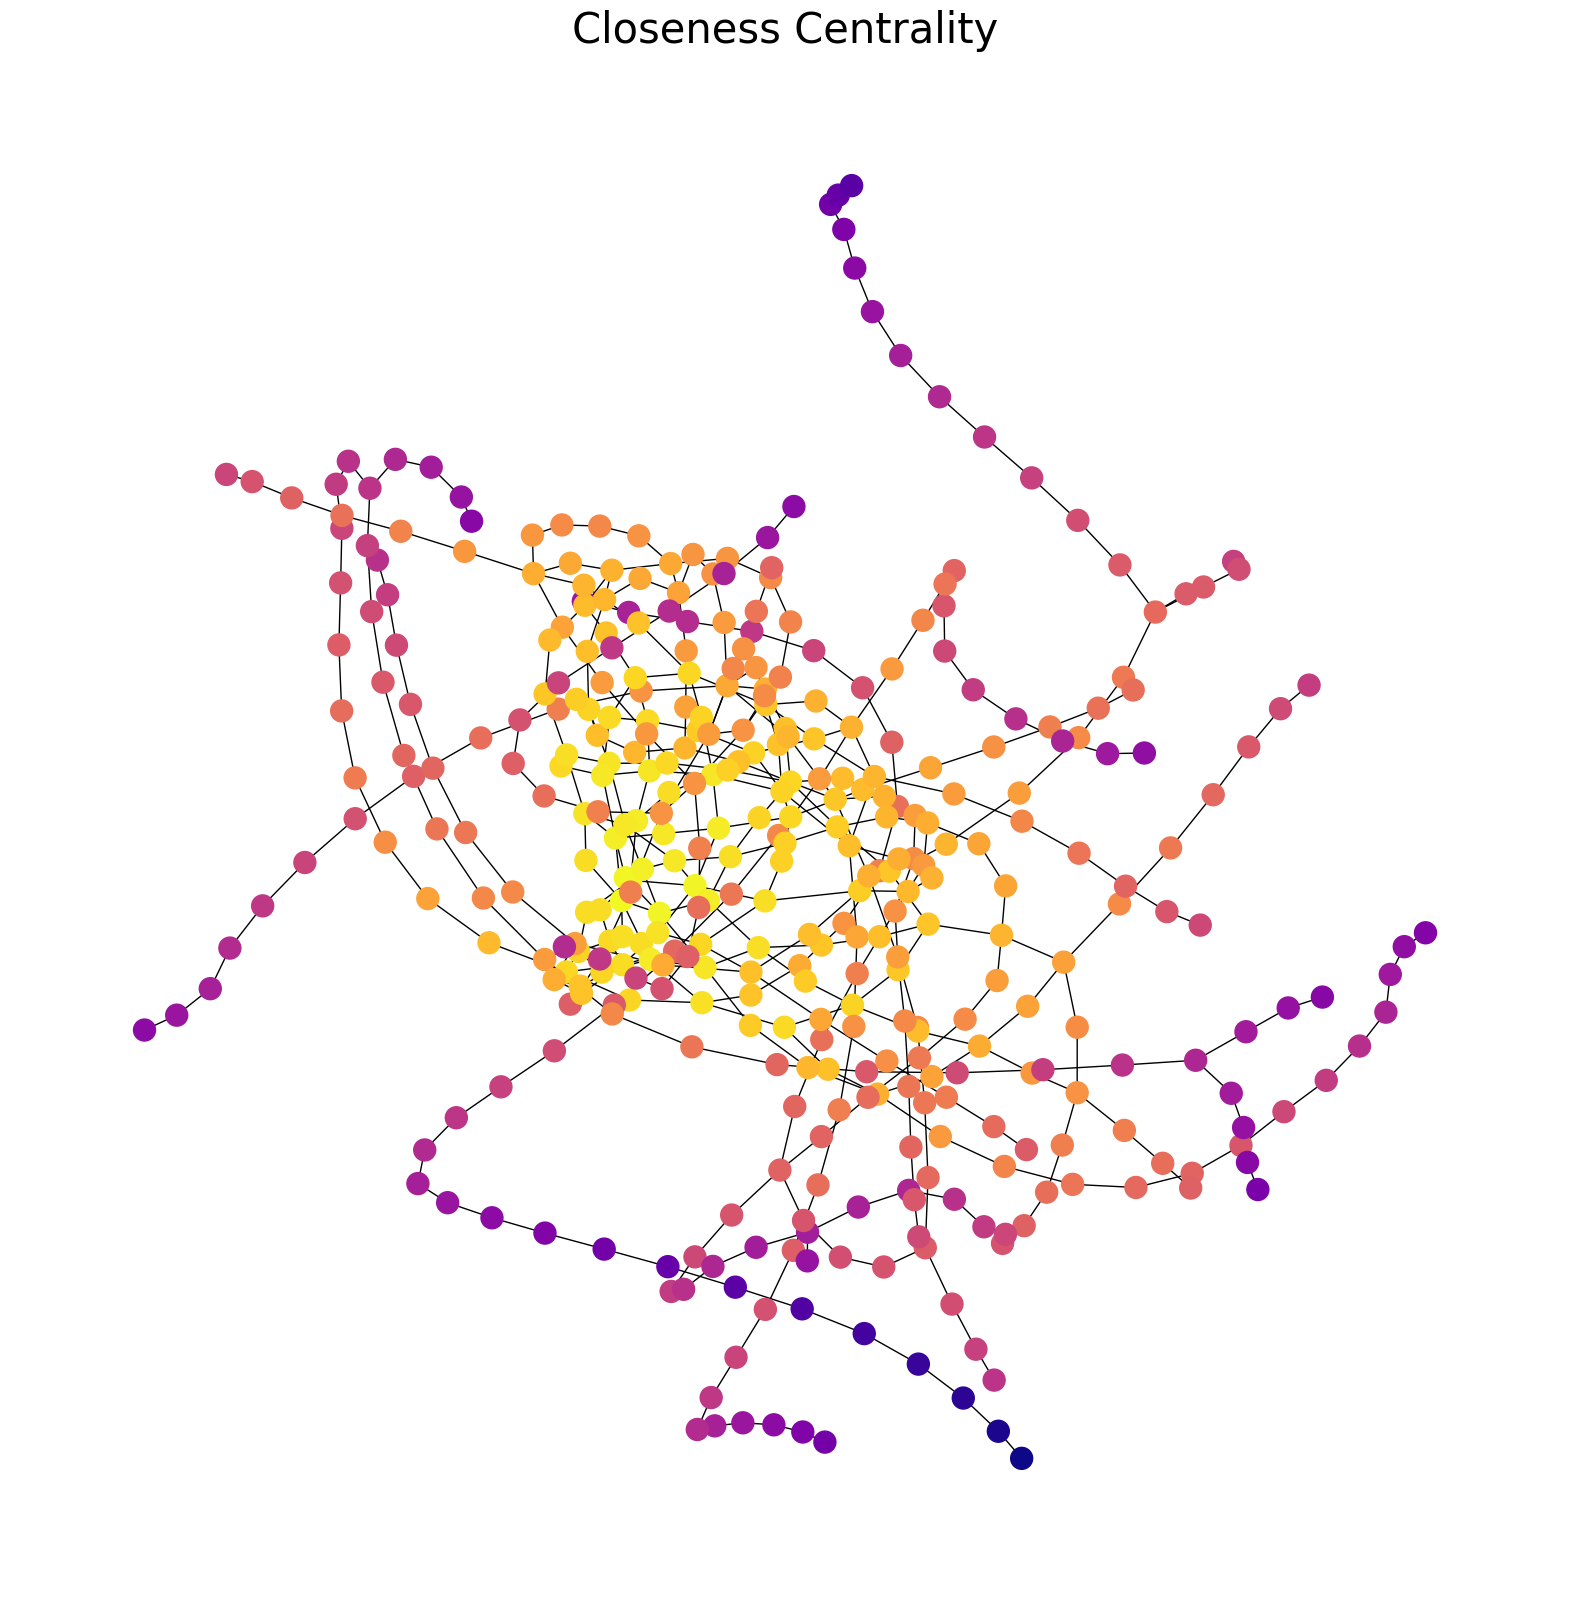

In [ ]:
draw(G_Train, pos, nx.closeness_centrality(G_Train), 'Closeness Centrality')

# 2) Import Test Dataset: Beijing Subway Station Network

In [ ]:
# Import Beijing Subway Stations Network
df_Test = pd.read_csv('Subway station connections_Beijing_New.csv')

In [ ]:
df_Test

,Source,Destination,Line,Time(min)
0,Gucheng,Bajiao Amusement Park,1,3
1,Bajiao Amusement Park,Babaoshan,1,3
2,Babaoshan,Yuquan Lu,1,3
3,Yuquan Lu,Wukesong,1,2
4,Wukesong,Wanshou Lu,1,3
...,...,...,...,...
421,Dongzhi Men,Sanyuan Qiao,25,3
422,Sanyuan Qiao,Terminal 3,25,13
423,Terminal 3,Terminal 2,25,14
424,Daxing Airport,Daxing Xincheng,26,12


## Creat Graph

In [ ]:
# Creat Undirected Graph
G_Test = nx.Graph()

## Creat graph from edge list

In [ ]:
for idx, row in df_Test.iterrows(): # go through every row of the list
    G_Test.add_edges_from([(row['Source'], row['Destination'])], line=row['Line'], time=row['Time(min)'])

## Check if the dataset was imported successfully

In [ ]:
# Number of Nodes
len(G_Test)

365

In [ ]:
# Number of Nodes
len(G_Test.nodes)

365

In [ ]:
# Number of Edges
len(G_Test.edges)

423

In [ ]:
# Check the edge properties
G_Test.edges[('Babaoshan', 'Yuquan Lu')]

{'line': 1, 'time': 3}

## Import node properties

In [ ]:
# Import node properties from a .csv file
node_attributes_Test = pd.read_csv("Node Properties_Beijing_New.csv")

In [ ]:
node_attributes_Test

,Station,Longitude,Latitude,District Average,House_price_1000m,Built Year,Green Rate,Plot Ratio,Label
0,Terminal 2,1.413842,1.534795,0.414123,0.167977,2003.719055,0.295202,1.532925,1
1,Terminal 3,1.562946,1.293946,0.203389,0.171771,1993.228577,0.295156,1.849001,1
2,Qilizhuang,-0.560164,-0.369991,0.337080,0.351632,2002.440002,0.306555,1.751499,3
3,Wanshou Si,-0.456868,0.356059,0.589710,0.595393,2000.566711,0.334873,2.500431,4
4,Wanshou Lu,-0.554573,-0.006279,0.589710,0.504373,1998.122925,0.305247,2.325004,3
...,...,...,...,...,...,...,...,...,...
360,Huangcun Xidajie,-0.307256,-1.576976,0.242672,0.206643,2012.503418,0.309686,2.205094,1
361,Huangqu,1.317176,0.145866,0.414123,0.252688,2003.714294,0.312099,1.673122,2
362,Heizhuanghu,1.455751,-0.438728,0.414123,0.230461,2001.776733,0.389572,1.047236,2
363,Gulou Dajie,0.096808,0.357015,0.686922,0.938323,1984.192444,0.252491,1.214583,4


In [ ]:
for index, row in node_attributes_Test.iterrows():
    station_name = row["Station"]
    G_Test.nodes[station_name]["Longitude"] = row["Longitude"]
    G_Test.nodes[station_name]["Latitude"] = row["Latitude"]
    G_Test.nodes[station_name]["District Average"] = row["District Average"]
    G_Test.nodes[station_name]["House_price_1000m"] = row["House_price_1000m"]
    G_Test.nodes[station_name]["Built Year"] = row["Built Year"]
    G_Test.nodes[station_name]["Green Rate"] = row["Green Rate"]
    G_Test.nodes[station_name]["Plot Ratio"] = row["Plot Ratio"]
    G_Test.nodes[station_name]["Label"] = row["Label"]

In [ ]:
node_name = "Longze"  # Check if the node properties was imported successfully
if G_Test.has_node(node_name):
    attributes = G_Test.nodes[node_name]
    print(f"Node: {node_name}, has Properties：{attributes}")
else:
    print(f"Node {node_name} does not exist in the graph.")

Node: Longze, has Properties：{'Longitude': -0.3915505493951423, 'Latitude': 1.4526044349761318, 'District Average': 0.2417210667649633, 'House_price_1000m': 0.3051116953649475, 'Built Year': 2010.763977, 'Green Rate': 0.303557, 'Plot Ratio': 2.563561, 'Label': 2}


## Graph Visualization

In [ ]:
# Graph layout visualization
pos = nx.spring_layout(G_Test, seed=123)

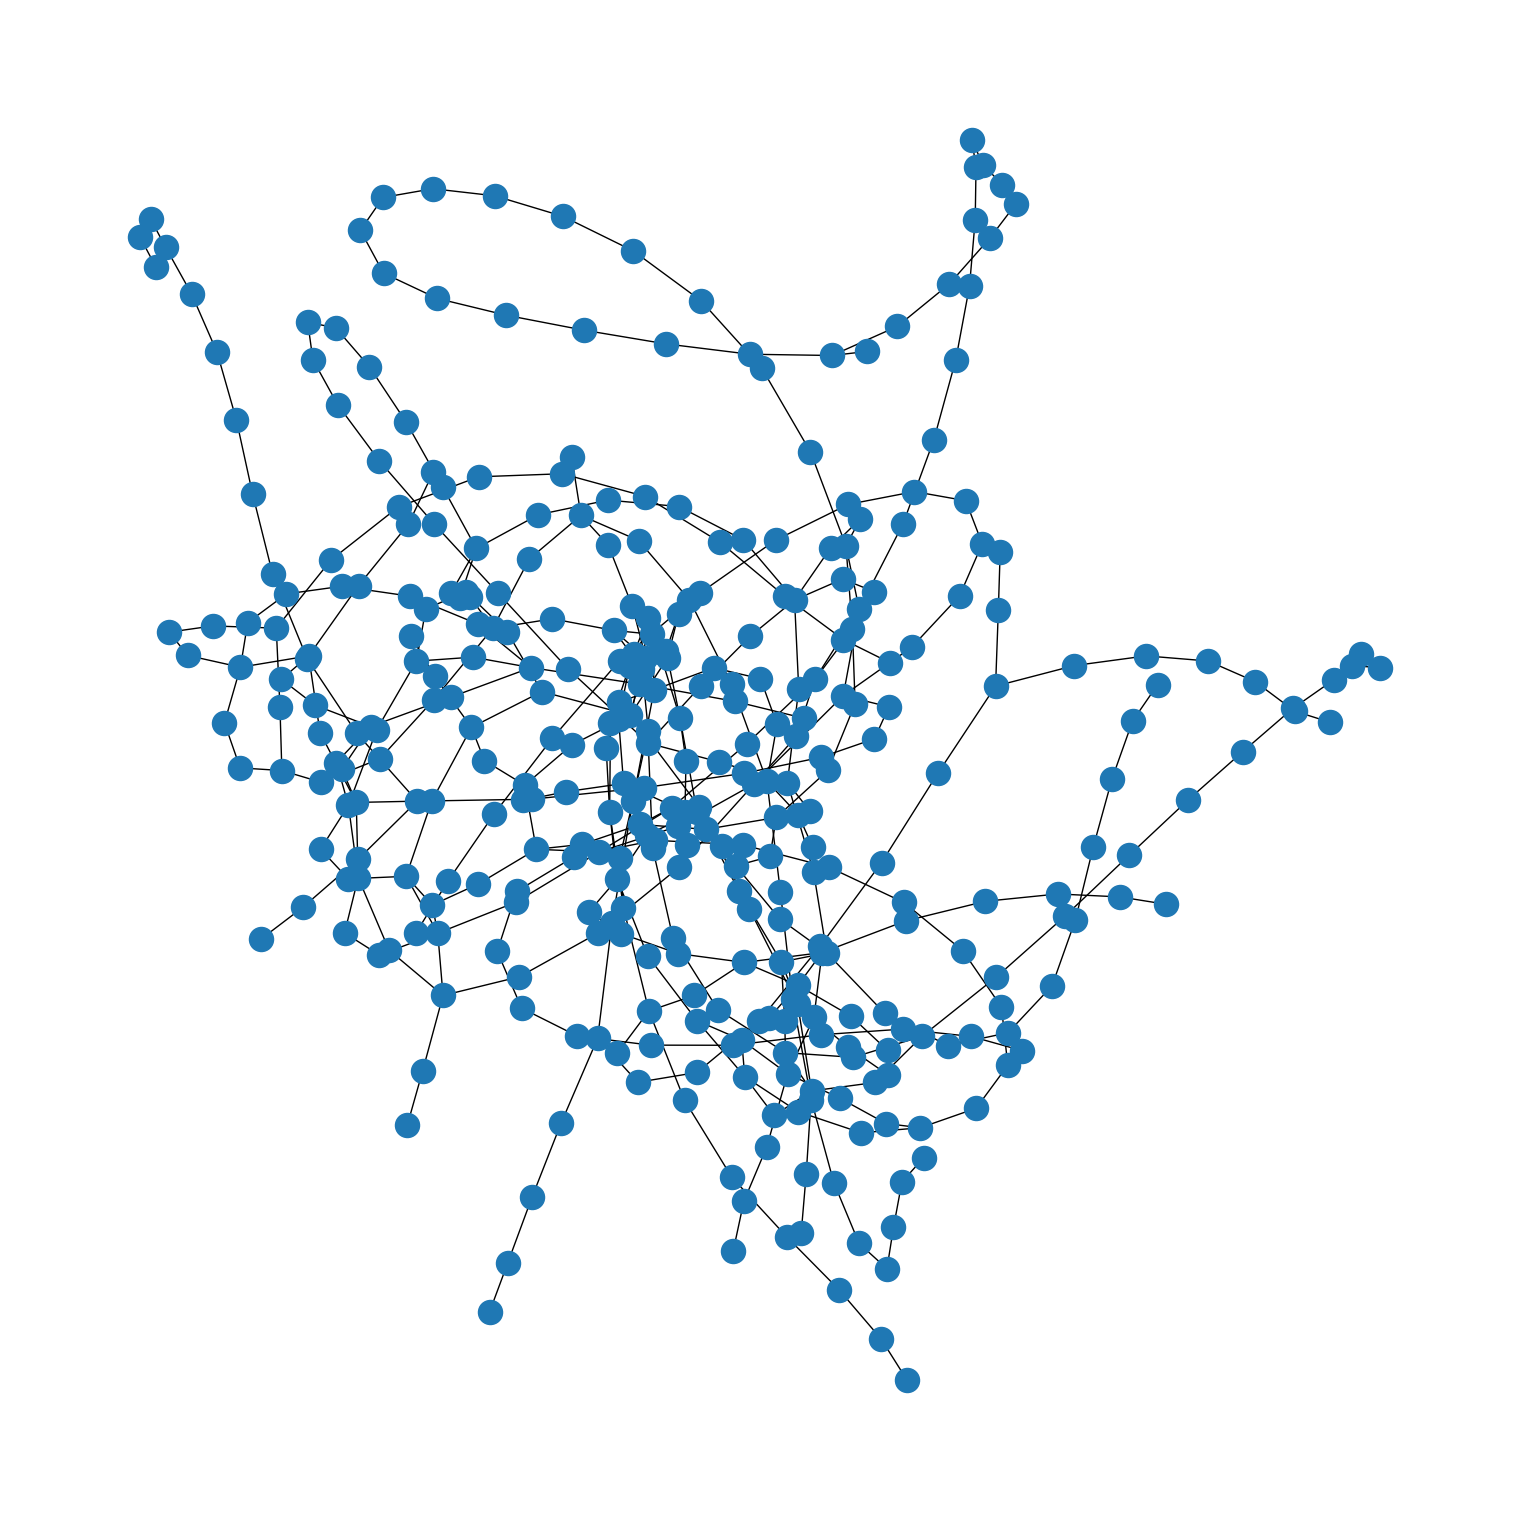

In [ ]:
plt.figure(figsize=(15,15))
nx.draw(G_Test, pos=pos)

# GCN Implementation

In [ ]:
!pip install torch-geometric

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Step 1: Prepare Node Features
# We create a feature matrix for the nodes where each row corresponds to a node and each column to a feature.
node_features = torch.tensor(node_attributes_Train[['Longitude', 'Latitude']].values, dtype=torch.float)
edge_features = torch.tensor(edge_attributes_Train[['Line', 'Time(min)']].values, dtype=torch.float)

# Step 2: Prepare Edge Index
# Convert the list of edge pairs into a torch tensor that represents the graph's connectivity in COO format.
edge_list = list(G_Train.edges())

# Create a mapping of node names to continuous indices which will be used in the tensor representation.
node_mapping_Train = {}
index_counter_Train = 0
for node in G_Train.nodes():
  node_mapping_Train[node] = index_counter_Train
  index_counter_Train += 1

edges_Train = []
for src, dst in G_Train.edges():
  src_index = node_mapping_Train[src]
  dst_index = node_mapping_Train[dst]
  edges_Train.append((src_index,dst_index))

# Convert the edges to a torch tensor, with shape [2, num_edges]
edge_index_Train = torch.tensor(edges_Train, dtype=torch.long).t()

# We create a target matrix for the nodes
target_values = torch.tensor(node_attributes_Train['House_price_1000m'].values, dtype=torch.float)
target_values = target_values.view(-1, 1)

# Step 3: Create a PyTorch Geometric Data Object
# The 'Data' object encapsulates the graph data, which includes node features, edge connectivity, and target values for each node.
data_Train = Data(x=node_features, edge_index=edge_index_Train, y=target_values)

# Step 4: Build the GCN Model
# We define a graph convolutional network (GCN) model for node-wise regression tasks.
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        # A linear layer to output a single value per node (regression)
        self.out = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x, edge_index):
        # First Graph Convolutional layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)

        # Second Graph Convolutional layer
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)

        # Output layer for regression
        x = self.out(x)
        return x

# Step 5: Training Setup
# Intitialize model with 2 input features and 16 hidden channels
model = GCN(num_features=2, hidden_channels=16)
# Loss function for regression (MSE Loss)
criterion = torch.nn.MSELoss()
# Optimizer to use for training (Adam) with a learning rate of 0.003
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# For reproducibility
torch.manual_seed(54321)

# Evaluation function to compute the loss on a given mask (train, validation, or test)
def evaluate():
    model.eval()
    with torch.no_grad():
        # Forward pass with node features and edge indices
        out = model(data_Train.x, data_Train.edge_index)
        # Compute loss between the predictions and the target values using the specified mask
        loss = criterion(out, data_Train.y)
    return loss.item()

# Calculate the average house price as the baseline
average_price = torch.mean(data_Train.y)
average_prices_pred = average_price.repeat(data_Train.y.shape[0], 1)

# Calculate baseline loss on the training and validation set
baseline_train_mse = criterion(average_prices_pred, data_Train.y).item()

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data_Train.x, data_Train.edge_index)
    loss = criterion(out, data_Train.y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Train Loss: {loss.item()}, Train loss baseline: {baseline_train_mse}')

# Assume you have a separate evaluation dataset with its own features and graph structure
eval_node_features = torch.tensor(node_attributes_Test[['Longitude', 'Latitude']].values, dtype=torch.float)
# Create a mapping of node names to continuous indices which will be used in the tensor representation.
node_mapping_Test = {}
index_counter_Test = 0
for node in G_Test.nodes():
  node_mapping_Test[node] = index_counter_Test
  index_counter_Test += 1

edges_Test = []
for src, dst in G_Test.edges():
  src_index = node_mapping_Test[src]
  dst_index = node_mapping_Test[dst]
  edges_Test.append((src_index,dst_index))

# Convert the edges to a torch tensor, with shape [2, num_edges]
edge_index_Test = torch.tensor(edges_Test, dtype=torch.long).t()
eval_target_values = torch.tensor(node_attributes_Test['House_price_1000m'].values, dtype=torch.float).view(-1, 1)

# Create a Data object for the evaluation dataset
data_Test = Data(x=eval_node_features, edge_index=edge_index_Test, y=eval_target_values)

# Calculate the average house price as the baseline
average_price = torch.mean(data_Test.y)
average_prices_pred = average_price.repeat(data_Test.y.shape[0], 1)

# Calculate baseline loss on the training and validation set
baseline_test_mse = criterion(average_prices_pred, data_Test.y).item()

def r_squared(preds, targets):
    total_variance = torch.var(targets)
    unexplained_variance = torch.var(targets - preds)
    r2 = 1 - unexplained_variance / total_variance
    return r2.item()

# Evaluate on the separate evaluation dataset
model.eval()
with torch.no_grad():
    eval_out = model(data_Test.x, data_Test.edge_index)
    eval_loss = criterion(eval_out, data_Test.y)
    r2_score = r_squared(eval_out, data_Test.y)

    print(f'Test Loss: {eval_loss.item()}, Test loss baseline: {baseline_test_mse}, R^2 value: {r2_score}')

GNN Implementation

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import NNConv

# load training node features and edge attributes, and target values
node_features = torch.tensor(node_attributes_Train[['Longitude', 'Latitude']].values, dtype=torch.float)
edge_features = torch.tensor(edge_attributes_Train[['Line', 'Time(min)']].values, dtype=torch.float)
target = torch.tensor(node_attributes_Train[['House_price_1000m']].values, dtype=torch.float)

# map stations to unique indices and then create edge index
station_to_idx = {station: i for i, station in enumerate(node_attributes_Train['Station'])}
edge_index = torch.tensor([(station_to_idx[src], station_to_idx[dest]) for src, dest in zip(edge_attributes_Train['Source'], edge_attributes_Train['Destination'])], dtype=torch.long).t().contiguous()

# create training data object
data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_features, y=target)

# GNN model with NNcConv
class GNN(torch.nn.Module):
    def __init__(self, input_dim, edge_feature_dim, output_dim, hidden_channels):
        super(GNN, self).__init__()
        # neural network (NN) to transform the edge attributes before convolution
        nn = torch.nn.Sequential(
            torch.nn.Linear(edge_feature_dim, hidden_channels),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_channels, input_dim * hidden_channels)
        )
        self.conv = NNConv(in_channels=input_dim, out_channels=hidden_channels, nn=nn, aggr='mean')
        self.fc = torch.nn.Linear(hidden_channels, output_dim)  # Output layer

    def forward(self, x, edge_index, edge_attr):
        x = self.conv(x, edge_index, edge_attr)
        x = torch.relu(x)
        return self.fc(x)

model = GNN(input_dim=node_features.size(1), edge_feature_dim=edge_features.size(1), output_dim=1, hidden_channels=16)

# loss function for regression (MSE Loss)
criterion = torch.nn.MSELoss()
# optimizer training (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

# For reproducibility
torch.manual_seed(12345)

# Calculate the average house price as the baseline
average_price = torch.mean(data.y)
average_prices_pred = average_price.repeat(data.y.shape[0], 1)

# Calculate baseline loss on the training and validation set
baseline_train_mse = criterion(average_prices_pred, data.y).item()

# Training loop
epochs = 20000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Train Loss: {loss.item()}, Train loss baseline: {baseline_train_mse}')

# prepare test data
node_features_Test = torch.tensor(node_attributes_Test[['Longitude', 'Latitude']].values, dtype=torch.float)
edge_features_Test = torch.tensor(edge_attributes_Test[['Line', 'Time(min)']].values, dtype=torch.float)

station_to_idx_Test = {station: i for i, station in enumerate(node_attributes_Test['Station'])}
edge_index_Test = torch.tensor([(station_to_idx_Test[src], station_to_idx_Test[dest]) for src, dest in zip(edge_attributes_Test['Source'], edge_attributes_Test['Destination'])], dtype=torch.long).t().contiguous()

target_Test = torch.tensor(node_attributes_Test[['House_price_1000m']].values, dtype=torch.float)

data_Test = Data(x=node_features_Test, edge_index=edge_index_Test, edge_attr=edge_features_Test, y=target_Test)

def mean_absolute_error(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))

# Calculate the average house price as the baseline
average_price = torch.mean(data_Test.y)
average_prices_pred = average_price.repeat(data_Test.y.shape[0], 1)

# Calculate baseline loss on the training and validation set
baseline_test_mse = criterion(average_prices_pred, data_Test.y).item()
baseline_test_mae = mean_absolute_error(average_prices_pred, data_Test.y).item()

def r_squared(preds, targets):
    total_variance = torch.var(targets)
    unexplained_variance = torch.var(targets - preds)
    r2 = 1 - unexplained_variance / total_variance
    return r2.item()

# evaluate on the test (Beijing) dataset
model.eval()
with torch.no_grad():
    eval_out = model(data_Test.x, data_Test.edge_index, data_Test.edge_attr)
    eval_loss = criterion(eval_out, data_Test.y)
    eval_loss2 = mean_absolute_error(eval_out, data_Test.y)
    r2_score = r_squared(eval_out, data_Test.y)

    print(f'Test Loss (MSE): {eval_loss.item()}, Test loss baseline (MSE): {baseline_test_mse}')
    print(f'Test Loss (MAE): {eval_loss2.item()}, Test loss baseline (MAE): {baseline_test_mae}')
    print(f'R^2 value: {r2_score}')